In [1]:
import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras as K
from tensorflow.keras import Sequential 

from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D, Conv2D, Activation, MaxPooling2D
from tensorflow.keras import activations
from keras.callbacks import LearningRateScheduler

import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing import image

%matplotlib inline

Using TensorFlow backend.


In [2]:
train_dir = 'Train/'
train_datagen = ImageDataGenerator(rescale=1./255,
    horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    target_size=(64, 64),
                                                    subset = 'training',
                                                    shuffle = True)



Found 22136 images belonging to 10 classes.


In [3]:
test_dir = 'Test/'
test_datagen = ImageDataGenerator(rescale=1./255
                                  )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    batch_size=16,
                                                    class_mode='categorical',
                                                    target_size=(64, 64),
                                                    shuffle = True)

Found 4864 images belonging to 10 classes.


In [4]:
'''model = Sequential() 
model.add(Conv2D(28, (3, 3), padding='same',input_shape=( 64, 64, 3))) 
model.add(Activation('relu')) 
model.add(Conv2D(28, (3, 3), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D((2,2), padding='same')) 
model.add(Conv2D(56, (3, 3),padding='same')) 
model.add(Activation('relu')) 
model.add(Conv2D(56, (3, 3), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D((2,2), padding='same')) 
model.add(Conv2D(112, (3, 3), padding='same')) 
model.add(Activation('relu')) 
model.add(Conv2D(112, (3, 3), padding='same')) 
model.add(Activation('relu')) 
model.add(MaxPooling2D((2,2), padding='same')) 
model.add(Flatten()) 
model.add(Dense(784)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(10))
model.add(Activation('softmax'))'''
model= tf.keras.models.load_model('Landmark Detection.h5')

In [5]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 28)        784       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 28)        7084      
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 28)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 28)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 56)        14168     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 56)        0

In [6]:
my_callbacks = [
  tf.keras.callbacks.ReduceLROnPlateau(
    monitor='acc', factor=0.75, patience=2, verbose=True,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=0 
  ), tf.keras.callbacks.ModelCheckpoint(
    'Landmark Detection.h5', monitor='val_acc', verbose=1, save_best_only=True,
    save_weights_only=False, mode='max', save_freq='epoch'
)]

In [7]:
history = model.fit(train_generator,
                    epochs=10,
                    workers = 8,
                    verbose=True,
                    steps_per_epoch= 2000,
                    validation_data=test_generator,
                    validation_steps= 100,
                    callbacks = my_callbacks)

Epoch 1/10
2000/2000 [==============================] - ETA: 0s - loss: 0.1376 - acc: 0.9628
Epoch 00001: val_acc improved from -inf to 0.89375, saving model to Landmark Detection.h5
2000/2000 [==============================] - 561s 280ms/step - loss: 0.1376 - acc: 0.9628 - val_loss: 0.6344 - val_acc: 0.8938 - lr: 0.0010
Epoch 2/10
2000/2000 [==============================] - ETA: 0s - loss: 0.1392 - acc: 0.9628
Epoch 00002: val_acc improved from 0.89375 to 0.89938, saving model to Landmark Detection.h5
2000/2000 [==============================] - 532s 266ms/step - loss: 0.1392 - acc: 0.9628 - val_loss: 0.5261 - val_acc: 0.8994 - lr: 0.0010
Epoch 3/10
2000/2000 [==============================] - ETA: 0s - loss: 0.1393 - acc: 0.9624
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0007500000356230885.

Epoch 00003: val_acc improved from 0.89938 to 0.90000, saving model to Landmark Detection.h5
2000/2000 [==============================] - 531s 265ms/step - loss: 0.1393 - acc: 0

[0.9628344774246216, 0.9627719521522522, 0.9623561501502991, 0.9743685722351074, 0.9783329367637634, 0.9757439494132996, 0.9742996692657471, 0.9841523170471191, 0.9866495728492737, 0.9875906705856323]
[0.893750011920929, 0.8993750214576721, 0.8999999761581421, 0.8987500071525574, 0.9006249904632568, 0.8968750238418579, 0.909375011920929, 0.890625, 0.8987500071525574, 0.8881250023841858]


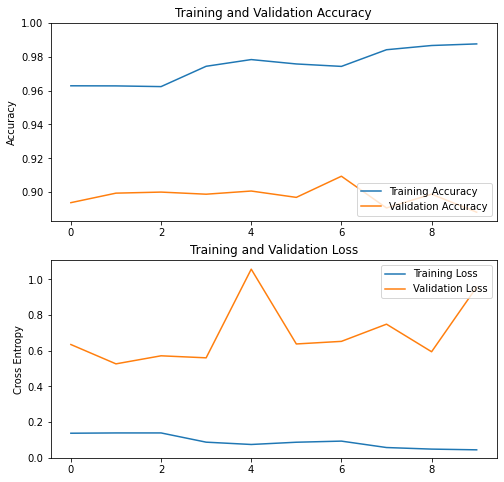

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

print(acc)
print(val_acc)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#model.save('Landmark Detection.h5')
model.save('Landmark Detection')

In [11]:
labels = test_generator.class_indices
labels = dict((v,k) for k,v in labels.items())
for i in range(len(labels)):
               print(labels[i])

AnnualCrop
Forest
HerbaceousVegetation
Highway
Industrial
Pasture
PermanentCrop
Residential
River
SeaLake


In [12]:
landamarks= ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway' , 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']

[[6.39774054e-02 1.88016911e-05 1.27766086e-07 6.70262179e-11
  1.17446826e-17 8.43312740e-01 1.56017723e-12 1.86084329e-29
  5.90834361e-06 9.26849917e-02]]
Pasture


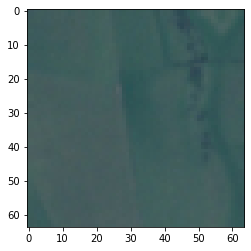

In [16]:

image_path = 'Test/Pasture/Pasture_3.jpg'
img = load_img(image_path, target_size = (64, 64))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255
p = model.predict(x)
print(p)
i = np.argmax(p,1).squeeze()
i = int(i)
print(landamarks[i])